In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import mlab

from scipy import signal
import h5py, time


In [4]:
%matplotlib notebook

In [5]:
import sys
sys.path.append('/home/analysis_user/New_trap_code/Tools/')
import BeadDataFile

In [6]:
#generate white noise that has the same length as 10 s data
s = np.random.normal(0, 1, 50000)

<IPython.core.display.Javascript object>


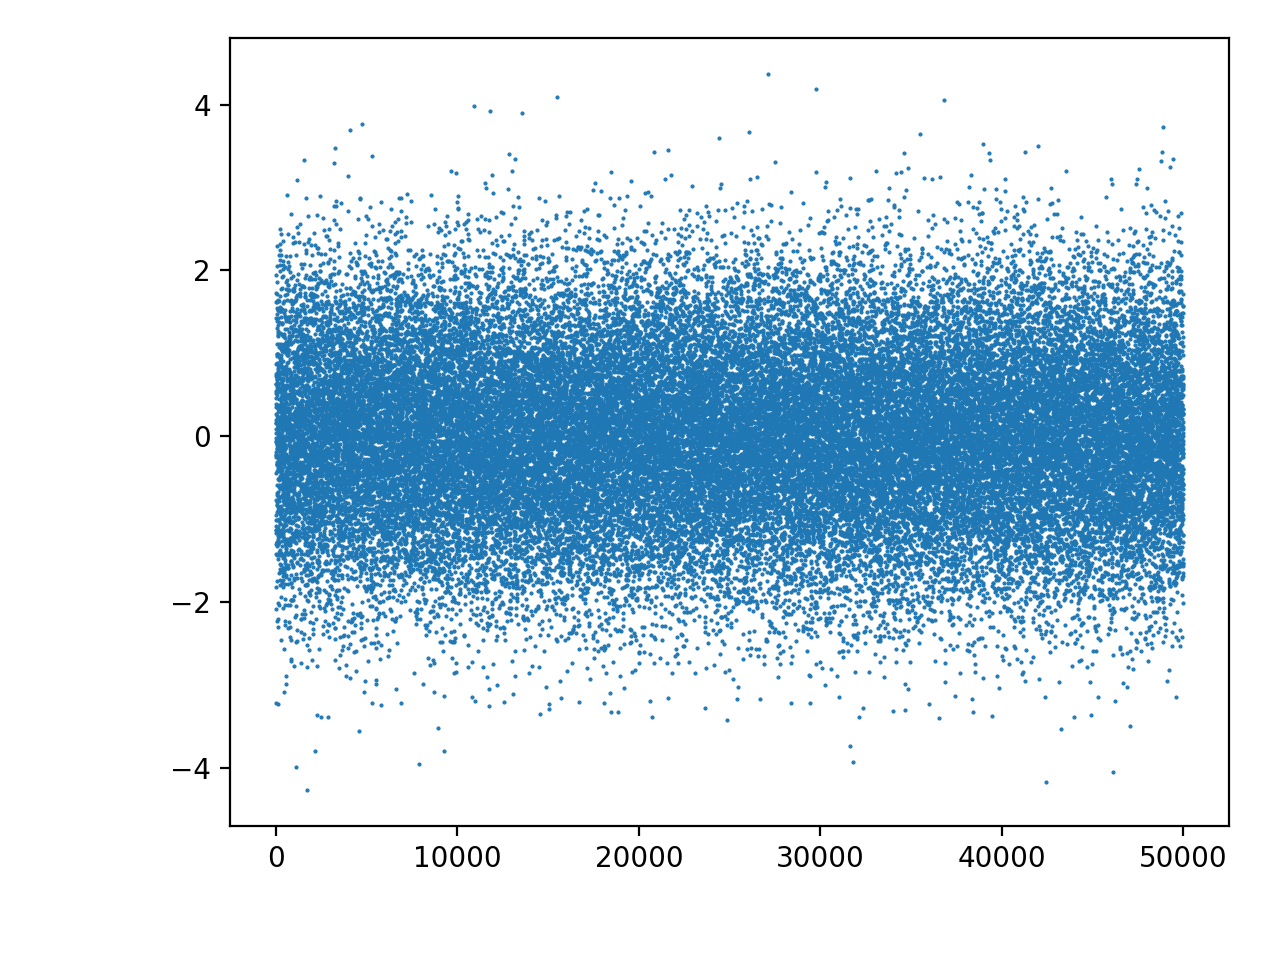

In [7]:
#plot s
_,ax = plt.subplots()
plt.subplots_adjust(left=0.18, right=0.96, top=0.96, bottom=0.14)
ax.plot(s, '.', label="x",markersize=1,linewidth=1)


In [17]:
#generate sinusoidal wave
x = np.arange(50000)
s2 = 0.005*np.cos(2 * np.pi   *13* x / (5000))

<IPython.core.display.Javascript object>


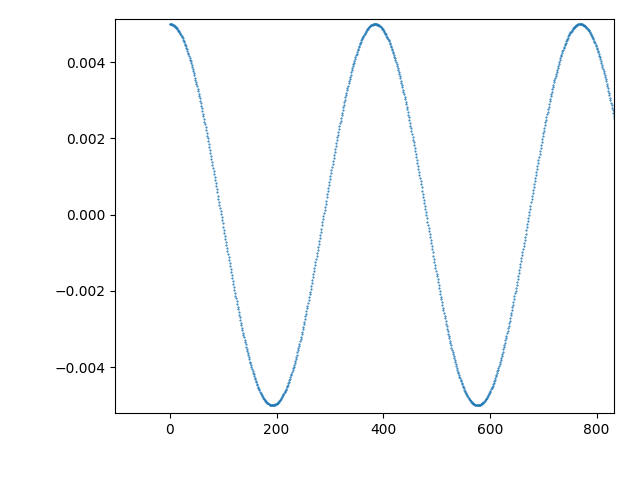

In [18]:
#plot s2
_,ax = plt.subplots()
plt.subplots_adjust(left=0.18, right=0.96, top=0.96, bottom=0.14)
ax.plot(s2, '.', label="x",markersize=1,linewidth=1)


In [32]:
#generate white noise that has the same length as 10 s data
fsamp=5000
res=50000
norm = np.sqrt(2 / (res* fsamp))
Fshake=13
Nint=2
Nave=3
Zero=0

for SineAmp in range (0,1):
    for NSubData in range(0,1000):

        s1 = np.random.normal(0, 2, 50000)
        x = np.arange(50000)
        s2 = np.cos(2 * np.pi   *Fshake* x / (5000))
        s=s1+0.001*SineAmp*s2

        sFFT=np.fft.fft(s)
        spsd = (sFFT * sFFT.conj()).real
        spsd = norm**2 * (sFFT * sFFT.conj()).real
        snsd=np.sqrt(spsd)
        sphase=np.arctan(sFFT.imag/sFFT.real)

        ofname = "/home/analysis_user/Results/AkioK/2020_01_10_DoughnutAnalysis/Noise2Cosine0FFT%d_%d.txt" % (SineAmp,NSubData)
       
        f1 = open(ofname,"a")

        for i in range(1,int(fsamp/2/Fshake)+1):
            Ints=sFFT[Fshake*10*i]
            IntNSDs=snsd[Fshake*10*i]

            for j in range(1,(Nint)):
                Ints+=sFFT[Fshake*10*i+j]+sFFT[Fshake*10*i-j]
                IntNSDs+=snsd[Fshake*10*i+j]+snsd[Fshake*10*i-j]

            AveNoiseX=0
            SigAmpX=IntNSDs-AveNoiseX*(Nint*2+1)
            SigPhaX=np.angle(Ints)         
            f1.write('%f %e %e %e %e %e %e\n' % (Fshake*i, SigAmpX, Zero, Zero, SigPhaX, Zero, Zero))
        f1.close()

In [34]:
#generate white noise that has the same length as 10 s data
#for different noise amplitude. 
fsamp=5000
res=50000
norm = np.sqrt(2 / (res* fsamp))
Fshake=13
Nint=2
Nave=3
Zero=0

for SineAmp in range (0,1):
    for NSubData in range(0,1000):

        s1 = np.random.normal(0, 10, 50000)
        x = np.arange(50000)
        s2 = np.cos(2 * np.pi   *Fshake* x / (5000))
        s=s1+0.001*SineAmp*s2

        sFFT=np.fft.fft(s)
        spsd = (sFFT * sFFT.conj()).real
        spsd = norm**2 * (sFFT * sFFT.conj()).real
        snsd=np.sqrt(spsd)
        sphase=np.arctan(sFFT.imag/sFFT.real)

        ofname = "/home/analysis_user/Results/AkioK/2020_01_10_DoughnutAnalysis/Noise10Cos0FFT%d_%d.txt" % (SineAmp,NSubData)
       
        f1 = open(ofname,"a")

        for i in range(1,int(fsamp/2/Fshake)+1):
            Ints=sFFT[Fshake*10*i]
            IntNSDs=snsd[Fshake*10*i]

            for j in range(1,(Nint)):
                Ints+=sFFT[Fshake*10*i+j]+sFFT[Fshake*10*i-j]
                IntNSDs+=snsd[Fshake*10*i+j]+snsd[Fshake*10*i-j]

            AveNoiseX=0
            SigAmpX=IntNSDs-AveNoiseX*(Nint*2+1)
            SigPhaX=np.angle(Ints)         
            f1.write('%f %e %e %e %e %e %e\n' % (Fshake*i, SigAmpX, Zero, Zero, SigPhaX, Zero, Zero))
        f1.close()

In [8]:
#generate white noise that has the same length as 10 s data
s = np.random.normal(0, 1, 50000)

In [9]:
fsamp=5000
res=50000
norm = np.sqrt(2 / (res* fsamp))
sFFT=np.fft.fft(s)
spsd = norm**2 * (sFFT * sFFT.conj()).real
snsd=np.sqrt(spsd)
sphase=np.angle(sFFT) 

<IPython.core.display.Javascript object>


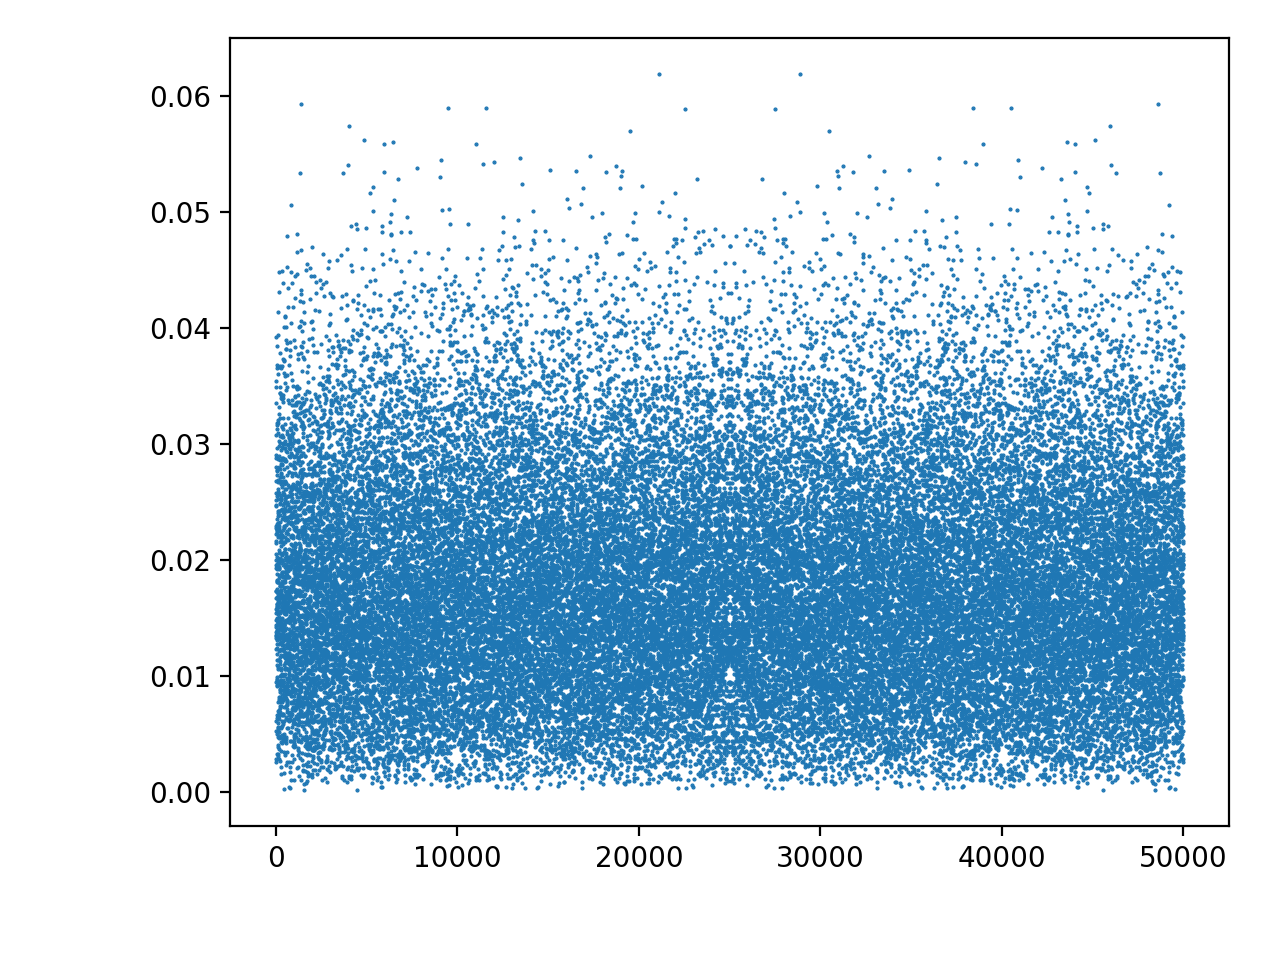

In [10]:
#plot s
_,ax = plt.subplots()
plt.subplots_adjust(left=0.18, right=0.96, top=0.96, bottom=0.14)
ax.plot(snsd, '.', label="x",markersize=1,linewidth=1)


In [13]:
np.average(snsd)


0.017737543561907168